# Load packages

Load the library of functions from the forecast package. You need to run this line each time you open this file.

In [2]:
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 



# Load and explore data

Before you load the data from the case, save the csv file into the same folder where this Jupyter notebook is saved

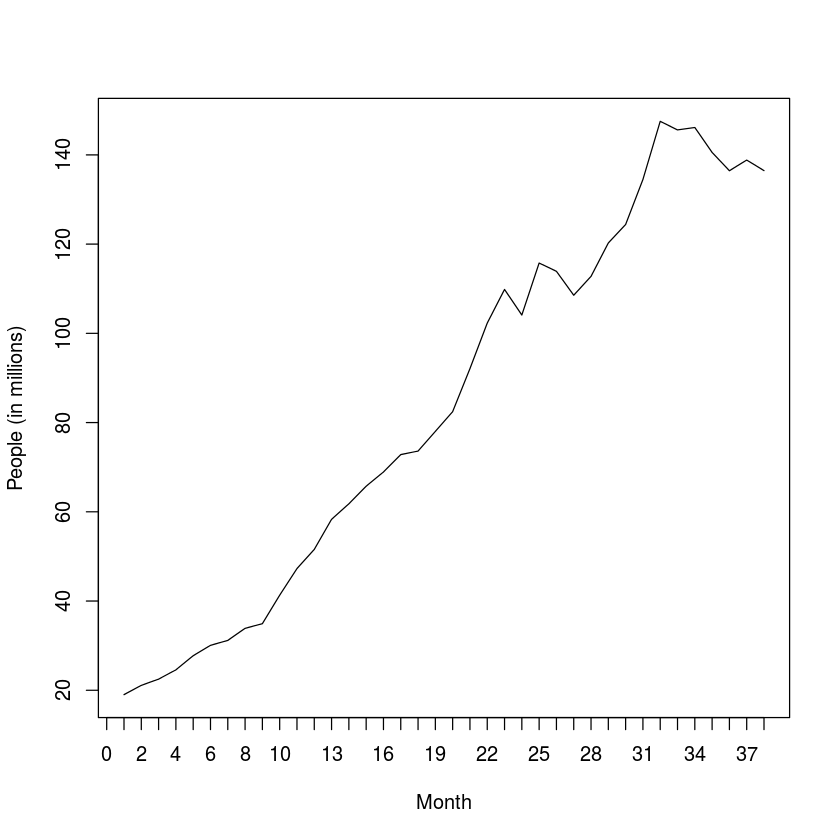

In [3]:
tumblr.data <- read.csv("Tumblr.csv")
people.ts <- ts(tumblr.data$People.Worldwide) / 1000000
par(mfrow = c(1, 1))
plot(people.ts, xaxp = c(0, 38, 38), xlab = "Month", ylab = "People (in millions)")

# Fit models

Run three exponential smoothing models: AAN, MMN, and MMdN.
MMN stands for Multiplicative error, Multiplicative trend, and No seasonality. MMdN stands for Multiplicative error, Multiplicative damped trend, and No seasonality.

In [4]:
people.ets.AAN <- ets(people.ts, model = "AAN")
people.ets.MMN <- ets(people.ts, model = "MMN", damped = FALSE)
people.ets.MMdN <- ets(people.ts, model = "MMN", damped = TRUE)

In [5]:
people.ets <- ets(people.ts, restrict = FALSE, allow.multiplicative.trend = TRUE)
people.ets

ETS(M,Md,N) 

Call:
 ets(y = people.ts, restrict = FALSE, allow.multiplicative.trend = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0028 
    phi   = 0.9559 

  Initial states:
    l = 16.8036 
    b = 1.1295 

  sigma:  0.0446

     AIC     AICc      BIC 
235.1759 237.0509 243.3638 

In [7]:
people.ets.AAN
people.ets.MMN
people.ets.MMdN 

ETS(A,A,N) 

Call:
 ets(y = people.ts, model = "AAN") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 15.9907 
    b = 3.1706 

  sigma:  4.5226

     AIC     AICc      BIC 
260.9190 262.1311 267.4693 

ETS(M,M,N) 

Call:
 ets(y = people.ts, model = "MMN", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1963 

  Initial states:
    l = 17.5185 
    b = 1.0884 

  sigma:  0.0473

     AIC     AICc      BIC 
238.4847 239.6968 245.0350 

ETS(M,Md,N) 

Call:
 ets(y = people.ts, model = "MMN", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0028 
    phi   = 0.9559 

  Initial states:
    l = 16.8036 
    b = 1.1295 

  sigma:  0.0446

     AIC     AICc      BIC 
235.1759 237.0509 243.3638 

# Make Predictions

Create their prediction "cones" for 115 months into the future (Jun 2013 to Dec 2022).


In [5]:
people.ets.AAN.pred <- forecast(people.ets.AAN, h = 115, level = c(0.2, 0.4, 0.6, 0.8))
people.ets.MMN.pred <- forecast(people.ets.MMN, h = 115, level = c(0.2, 0.4, 0.6, 0.8))
people.ets.MMdN.pred <- forecast(people.ets.MMdN, h = 115, level = c(0.2, 0.4, 0.6, 0.8))

Compare the three models' "forecast cones" visually.

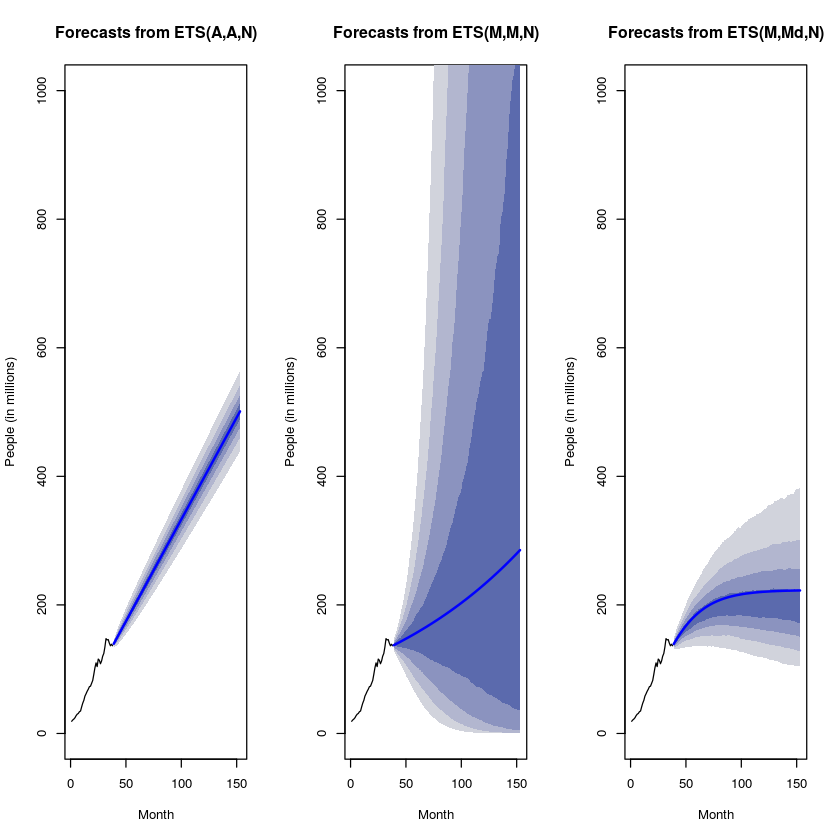

In [6]:
par(mfrow = c(1, 3)) # This command sets the plot window to show 1 row of 3 plots.
plot(people.ets.AAN.pred, xlab = "Month", ylab = "People (in millions)", ylim = c(0, 1000))
plot(people.ets.MMN.pred, xlab = "Month", ylab="People (in millions)", ylim = c(0, 1000))
plot(people.ets.MMdN.pred, xlab = "Month", ylab="People (in millions)", ylim = c(0, 1000))

Examine the lower and upper limits of the MMN model's prediction cones.

In [7]:
people.ets.MMN.pred$lower 
people.ets.MMN.pred$upper

40%,30%,20%,10%
135.717953282256,133.967042225966,131.889980079256,128.979873281127
135.481693648011,132.656330718779,129.694805202382,125.495537070696
135.526482087262,131.681528136825,127.511700643457,121.822568720972
135.194996883387,130.3375565417,125.140763504809,118.672426071408
134.820732132838,129.186131612774,123.068010270061,114.769182938194
134.637973623449,127.909856021631,120.839036359441,111.895267644418
134.231078091244,126.317496752311,118.167156484915,108.426396683678
134.060394733592,125.345710723903,116.252988368997,105.022573933473
133.382024162794,124.613571909545,114.158006166379,101.837195618209
133.362322207222,122.983635979766,112.132138910512,98.0928150385898


60%,70%,80%,90%
138.97662739574,140.780225997335,142.716153959572,145.772786519386
140.824321271002,143.815627355547,146.996085047495,151.874886631949
142.810128987589,146.312373554513,150.710742593631,157.064571498245
144.325890119206,149.251207796444,154.570552350879,162.608156627962
145.734875008907,151.801193188968,159.571566202368,169.207985917961
147.752122923538,154.907187466431,164.105055300491,176.859950859153
149.026728033138,158.022880648083,169.100959451775,184.847195400657
151.505460613302,161.667011269187,174.47407112606,193.216130024427
153.413113596286,164.88310724619,178.978499407877,200.910317407733
155.561572049715,167.923989460904,184.888234316298,210.018361156983


# Save predictions to a csv file

Write the mean predictions to a csv file for use in your valuation model. 
You can open the csv file in Excel and copy and paste the forecasts into your valuation model.

In [10]:
write.csv(cbind(people.ets.AAN.pred$mean, people.ets.MMN.pred$mean, people.ets.MMdN.pred$mean), file = "Tumblr forecast.csv")

ets {forecast},R Documentation
y,a numeric vector or time series
model,"Usually a three-character string identifying method using the framework terminology of Hyndman et al. (2002) and Hyndman et al. (2008). The first letter denotes the error type (""A"", ""M"" or ""Z""); the second letter denotes the trend type (""N"",""A"",""M"" or ""Z""); and the third letter denotes the season type (""N"",""A"",""M"" or ""Z""). In all cases, ""N""=none, ""A""=additive, ""M""=multiplicative and ""Z""=automatically selected. So, for example, ""ANN"" is simple exponential smoothing with additive errors, ""MAM"" is multiplicative Holt-Winters' method with multiplicative errors, and so on. It is also possible for the model to be of class ""ets"", and equal to the output from a previous call to ets. In this case, the same model is fitted to y without re-estimating any smoothing parameters. See also the use.initial.values argument."
damped,"If TRUE, use a damped trend (either additive or multiplicative). If NULL, both damped and non-damped trends will be tried and the best model (according to the information criterion ic) returned."
alpha,"Value of alpha. If NULL, it is estimated."
beta,"Value of beta. If NULL, it is estimated."
gamma,"Value of gamma. If NULL, it is estimated."
phi,"Value of phi. If NULL, it is estimated."
additive.only,"If TRUE, will only consider additive models. Default is FALSE."
lambda,"Box-Cox transformation parameter. Ignored if NULL. Otherwise, data transformed before model is estimated. When lambda=TRUE, additive.only is set to FALSE."
lower,"Lower bounds for the parameters (alpha, beta, gamma, phi)"
